In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
chernobyl_coords = (30.0927, 51.3870) # (Lon, lat) or (x, y)

MAP_SIZE_IN_DEGREES = (100, 50)

LOWER_LEFT_X_LON = chernobyl_coords[0] - MAP_SIZE_IN_DEGREES[0]/2
LOWER_LEFT_Y_LAT = chernobyl_coords[1] - MAP_SIZE_IN_DEGREES[1]/2
UPPER_LEFT_X_LON = chernobyl_coords[0] + MAP_SIZE_IN_DEGREES[0]/2
UPPER_LEFT_Y_LAT = chernobyl_coords[1] + MAP_SIZE_IN_DEGREES[1]/2



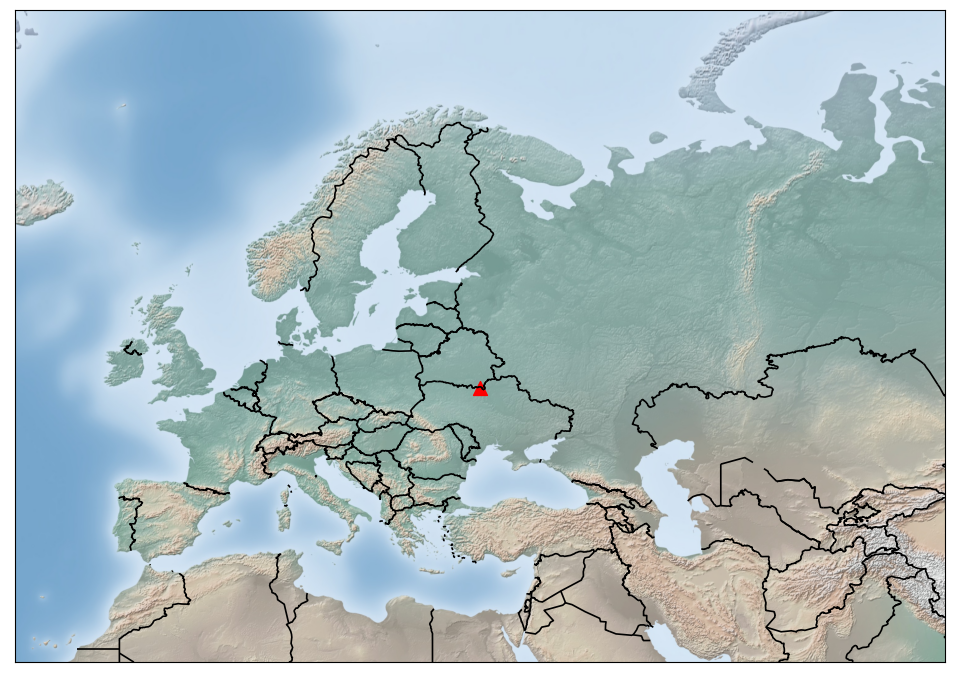

In [3]:
fig = plt.figure(figsize=(12,9))

# world map has a lower left corner of (-180, -90) and an upper right corner of (180, 90)
m = Basemap(projection='mill',
            llcrnrlon=LOWER_LEFT_X_LON, # X axis for map is longitude
            llcrnrlat=LOWER_LEFT_Y_LAT, # Y axis for map is latitude
            urcrnrlon=UPPER_LEFT_X_LON, 
            urcrnrlat=UPPER_LEFT_Y_LAT,
            resolution="i") # c-crude, l-low, i-intermediate, h-high, f-full

m.shadedrelief() # makes it look pretty :)
m.drawcountries(linewidth=1.2)

# Locate Chernobyl
m.scatter(chernobyl_coords[0], chernobyl_coords[1], latlon=True, s=100, c='red', marker='^', alpha=1) # puts a red triangle at the (lon,lat) coordinate

plt.show()

In [4]:
sensor_latitudes = []
sensor_longitudes = []

data = pd.read_csv("data/archive/data1.csv")

for lon, lat, ville in data.filter(['X','Y', "Ville"]).drop_duplicates().values:
    print(lon, lat, ville)
    sensor_longitudes.append(lon)
    sensor_latitudes.append(lat)


assert len(sensor_latitudes) == len(sensor_longitudes) and len(sensor_latitudes) > 50

12.07 55.7 RISOE
6.1 50.76 AACHEN(DWD)
6.1 50.76 AACHEN(RWTH)
10.59 49.3 ANSBACH
13.42 52.5 BERLIN-WEST
12.78 49.2 BROTJACKLRIEGEL
7.87 48.0 FREIBURG(BZS)
7.87 48.0 FREIBURG(DWD)
9.95 51.53 GOETTINGEN
9.73 52.38 HANNOVER
8.67 49.0 KARLSRUHE
7.65 51.11 MEINERZHAGEN
11.58 48.13 NEUHERBERG
7.15 53.71 NORDERNEY
8.77 50.1 OFFENBACH
8.94 48.46 ROTTENBURG
11.34 48.0 STARNBERG
10.75 52.81 WALDHOF
5.75 43.71 CADARACHE
0.25 47.15 CHINON
4.81 50.1 CHOOZ
4.8 44.63 CRUAS
2.51 47.71 'DAMPIERRE EN BURLY'
7.56 47.91 FESSENHEIM
-1.9 49.55 FLAMANVILLE
2.31 51.0 GRAVELINES
5.72 45.18 GRENOBLE
5.26 45.8 'LE BUGEY'
2.13 48.88 'LE VESINET'
4.8 44.13 MARCOULE
7.42 43.73 MONACO
2.18 48.68 ORSAY
2.36 48.85 PARIS
2.16 48.73 SACLAY
4.75 45.4 'SAINT ALBAN'
1.58 47.71 'ST.Laurent des eaux'
4.73 44.33 TRICASTIN
5.38 49.15 VERDUN
-6.28 53.37 GLASNEVIN.Dublin
11.33 44.48 BOLOGNA
11.33 44.48 BRASIMONE
12.3 42.03 CAPANNA
12.3 42.03 CASACCIA
8.63 45.8 ISPRA
8.02 45.21 SALUGGIA(eurex)
8.02 45.21 SALUGGIA(IFEC)
16.63 40.1

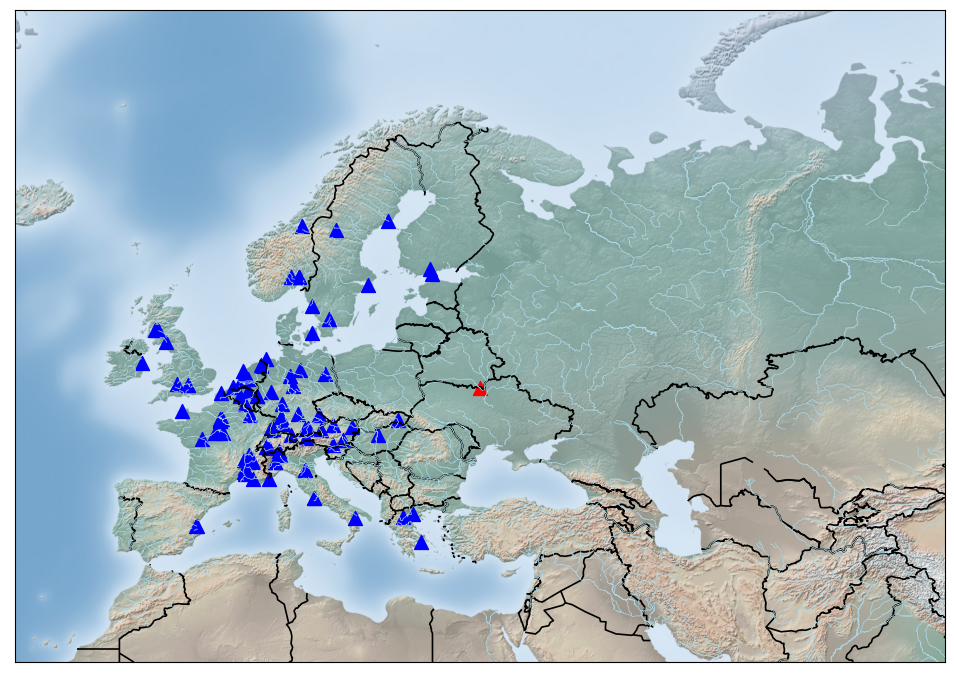

In [5]:
fig = plt.figure(figsize=(12,9))

# world map has a lower left corner of (-180, -90) and an upper right corner of (180, 90)
m = Basemap(projection='mill',
            llcrnrlon=LOWER_LEFT_X_LON, # X axis for map is longitude
            llcrnrlat=LOWER_LEFT_Y_LAT, # Y axis for map is latitude
            urcrnrlon=UPPER_LEFT_X_LON, 
            urcrnrlat=UPPER_LEFT_Y_LAT,
            resolution="i") # c-crude, l-low, i-intermediate, h-high, f-full

m.shadedrelief() # makes it look pretty :)
m.drawcountries(linewidth=1.2)
m.drawrivers(color="lightblue")

# Locate Chernobyl
m.scatter(chernobyl_coords[0], chernobyl_coords[1], latlon=True, s=100, c='red', marker='^', alpha=1) # puts a red triangle at the (lon,lat) coordinate

#Locate Each Sensor:
m.scatter(sensor_longitudes, sensor_latitudes, latlon=True, s=100, c='blue', marker='^', alpha=1) 



plt.show()